In [63]:
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import numpy as np
import math
from numpy import sqrt 

In [64]:
time = pd.read_csv("C:\Aalesh and Mandar\Datasets\FRED-NROUST.csv")

In [65]:
time.head()

,Date,Value
0,01-01-1949,5.255053
1,01-04-1949,5.261516
2,01-07-1949,5.268013
3,01-10-1949,5.274564
4,01-01-1950,5.281182


In [66]:
time.shape

(296, 2)

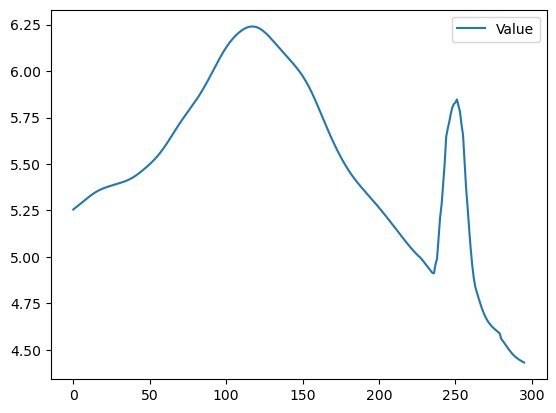

In [67]:
time.plot()
plt.show()

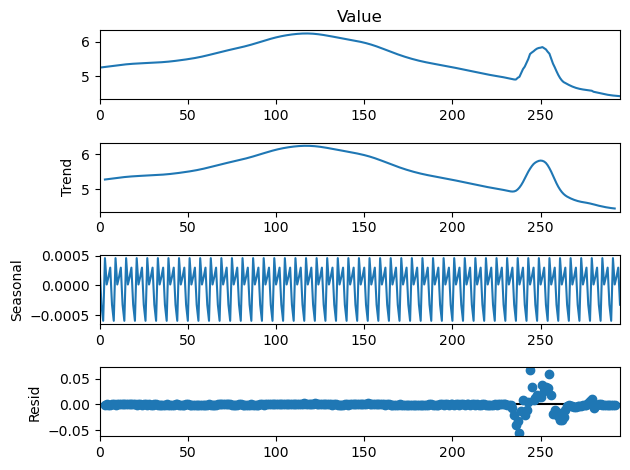

In [68]:
result = seasonal_decompose(time["Value"], model = "additive", period = 6)
result.plot()
plt.show()

In [69]:
y = time["Value"]
y_train = time["Value"][:-12]
y_test = time["Value"][-12:]

## Auto Reg

In [70]:
model = AutoReg(y_train, lags=5)
model_fit = model.fit()
print("Coefficient: " % model_fit.params)

Coefficient: 


In [71]:
pred = model_fit.predict(start=len(y_train), end=len(y_train)+len(y_test)-1, dynamic=False)

In [72]:
error = mean_squared_error(y_test, pred)
print("Test RMSE: %0.3f" % sqrt(error))

Test RMSE: 0.096


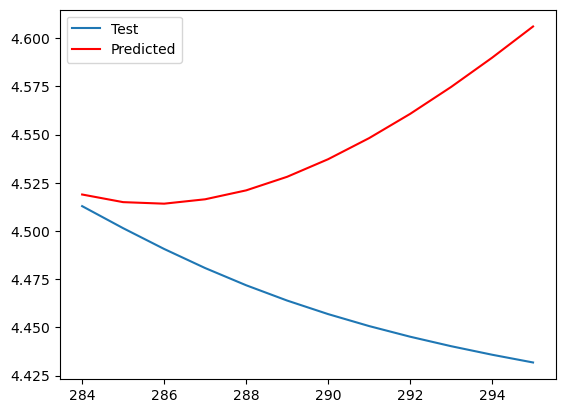

In [73]:
plt.plot(y_test, label="Test")
plt.plot(pred, color="red", label="Predicted")
plt.legend(loc="best")
plt.show()

## ARIMA

In [74]:
from statsmodels.tsa.arima.model import ARIMA

In [75]:
model = ARIMA(y_train, order = (4,1,2))
model_fit = model.fit()
print("Coefficient: " % model_fit.params)

C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Coefficient: 


In [76]:
pred = model_fit.predict(start=len(y_train), end=len(y_train)+len(y_test)-1, dynamic=False)

In [77]:
error = mean_squared_error(y_test, pred)
print("Test RMSE: %0.3f" % sqrt(error))

Test RMSE: 0.008


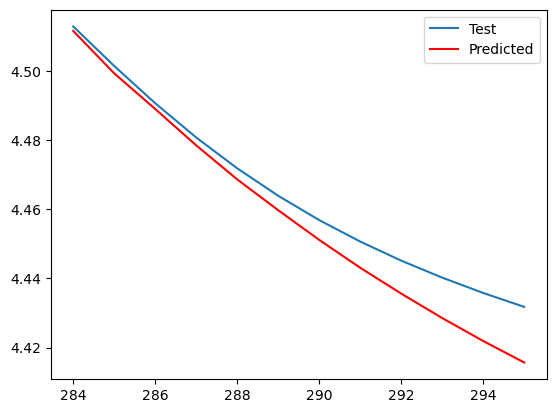

In [78]:
plt.plot(y_test, label="Test")
plt.plot(pred, color="red", label="Predicted")
plt.legend(loc="best")
plt.show()

## Auto Arima

In [79]:
from pmdarima.arima import auto_arima

In [80]:
model = auto_arima(y_train, trace = True, error_action="ignore", suppress_warnings=True)

forecast =model.predict(n_periods = len(y_test))

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=inf, Time=0.43 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-1695.064, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=-1704.293, Time=0.05 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=-1701.750, Time=0.04 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=-1703.962, Time=0.08 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=-1703.058, Time=0.07 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=-1707.549, Time=0.32 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=-1705.118, Time=0.19 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=-1718.937, Time=0.36 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=-1705.415, Time=0.03 sec
 ARIMA(1,2,3)(0,0,0)[0]             : AIC=-1715.769, Time=0.33 sec
 ARIMA(0,2,3)(0,0,0)[0]             : AIC=-1724.788, Time=0.18 sec
 ARIMA(0,2,4)(0,0,0)[0]             : AIC=-1758.766, Time=0.40 sec
 ARIMA(1,2,4)(0,0,0)[0]             : AIC=-1742.820, Time=0.43 sec
 ARIMA(0,2,5)(0,0,0)[0]  

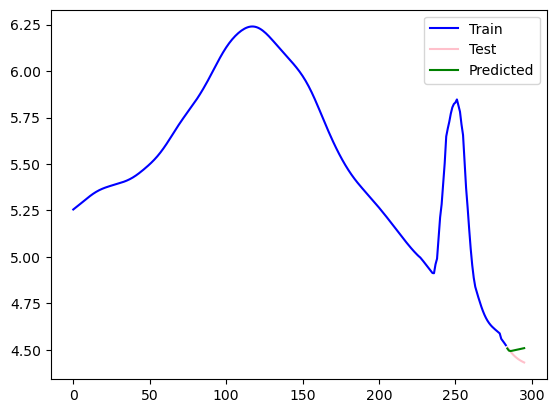

In [81]:
plt.plot(y_train, label="Train", color="blue")
plt.plot(y_test, label="Test", color="Pink")
plt.plot(forecast, color="Green", label="Predicted")
plt.legend(loc="best")
plt.show()

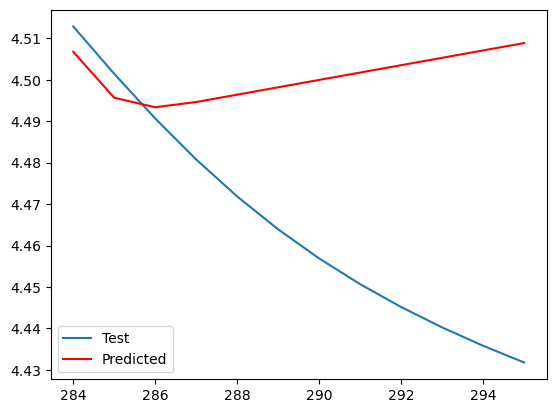

In [82]:
plt.plot(y_test, label="Test")
plt.plot(forecast, color="red", label="Predicted")
plt.legend(loc="best")
plt.show()

## SARIMA

In [83]:
from pmdarima.arima import auto_arima

In [84]:
model = auto_arima(y_train, trace = True, error_action="ignore", suppress_warnings=True, seasonal=True, m=12)

forecast =model.predict(n_periods = len(y_test))

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(1,0,1)[12]             : AIC=-1693.579, Time=0.93 sec
 ARIMA(0,2,0)(0,0,0)[12]             : AIC=-1695.064, Time=0.02 sec
 ARIMA(1,2,0)(1,0,0)[12]             : AIC=-1706.650, Time=0.07 sec
 ARIMA(0,2,1)(0,0,1)[12]             : AIC=-1704.150, Time=0.15 sec
 ARIMA(1,2,0)(0,0,0)[12]             : AIC=-1704.293, Time=0.05 sec
 ARIMA(1,2,0)(2,0,0)[12]             : AIC=-1707.149, Time=0.66 sec
 ARIMA(1,2,0)(2,0,1)[12]             : AIC=-1705.178, Time=1.03 sec
 ARIMA(1,2,0)(1,0,1)[12]             : AIC=-1707.381, Time=0.49 sec
 ARIMA(1,2,0)(0,0,1)[12]             : AIC=-1705.944, Time=0.13 sec
 ARIMA(1,2,0)(1,0,2)[12]             : AIC=-1705.079, Time=1.02 sec
 ARIMA(1,2,0)(0,0,2)[12]             : AIC=-1706.603, Time=0.51 sec
 ARIMA(1,2,0)(2,0,2)[12]             : AIC=-1702.945, Time=0.74 sec
 ARIMA(0,2,0)(1,0,1)[12]             : AIC=-1695.297, Time=0.30 sec
 ARIMA(2,2,0)(1,0,1)[12]             : AIC=-1706.190, Time=0.59 sec
 ARIM

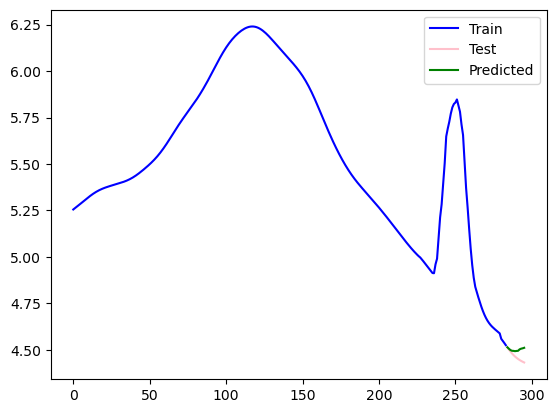

In [85]:
plt.plot(y_train, label="Train", color="blue")
plt.plot(y_test, label="Test", color="Pink")
plt.plot(forecast, color="Green", label="Predicted")
plt.legend(loc="best")
plt.show()

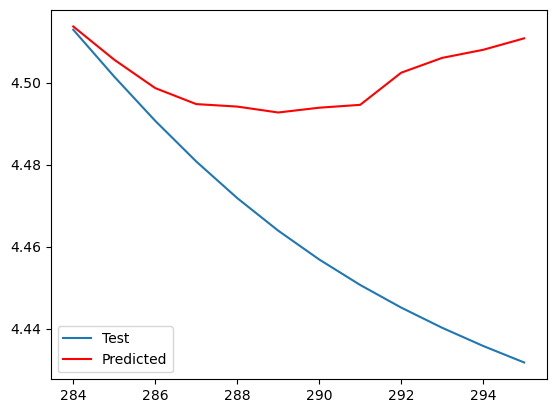

In [86]:
plt.plot(y_test, label="Test")
plt.plot(forecast, color="red", label="Predicted")
plt.legend(loc="best")
plt.show()